# Age Estimation 

In [ ]:
import numpy as np
import os
from prepare_data_sgd import *

# Loading Data

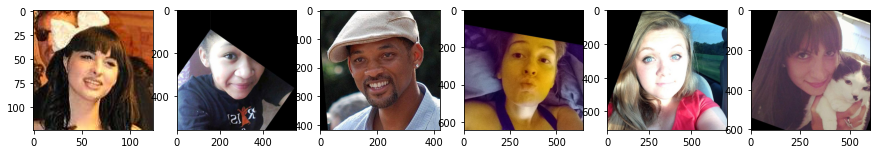

In [4]:
base_dir = 'DATASET/'

age_train, features_train = prepare_data('train', base_dir)
age_val, features_val = prepare_data('val', base_dir)
_, features_test = prepare_data('test', base_dir)
show_data(base_dir)

# Implement Closed Form Solution
```
Arguments:
    age          -- numpy array, shape (n, )
    features     -- numpy array, shape (n, 2048)
Returns:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [ ]:
def closed_form_solution(age, features):
    # Preprocess
    H = features
    ones = np.ones(len(H))
    H = np.column_stack((ones,H))
    Y = age
    
    # Define parameter weights
    
    ##########################################################################
    # TODO: YOUR CODE HERE
    ########################################################################## 
    # calculate the closed form solution
    XT = H.T
    XTX = np.dot(XT, H)
    XTy = np.dot(XT, Y)
    weights = np.dot(np.linalg.pinv(XTX), XTy)

    # separate the weights and bias
    bias    = weights[0]
    weights = weights[1:]
    
    return weights, bias

# Validate

Your validate loss is: 67.84


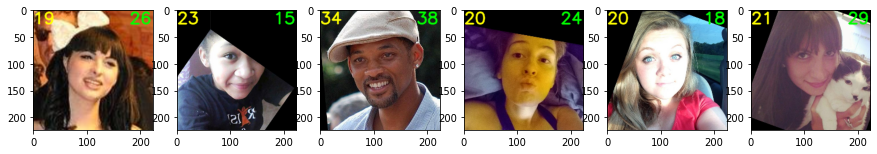

In [6]:
w, b = closed_form_solution(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate loss is:", round(loss, 3))

# Test and Generate results file

In [7]:
prediction = test(w, b, features_test, 'cfs.txt')
print("Test results has saved to cfs.txt")
print(prediction[:10])


Test results has saved to cfs.txt
[[28.04639955]
 [60.90374515]
 [55.1959496 ]
 [23.35683528]
 [35.20122172]
 [34.36335502]
 [36.63257243]
 [44.11504396]
 [18.49147772]
 [57.60077169]]


# Implement Gradient descent
Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model.

```
Arguments:
    age          -- numpy array, label, (n, )
    feature      -- numpy array, features, (n, 2048)
Return:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [ ]:
def gradient_descent(age, feature):
    assert len(age) == len(feature)

    # Init weights and bias
    weights = np.random.randn(2048, 1)
    bias = np.random.randn(1, 1)
    
    # Learning rate
    lr = 10e-3
    
    for e in range(epoch):
        ##########################################################################
        # TODO: YOUR CODE HERE
        ########################################################################## 
        weights = np.reshape(weights, (2048, ))
        bias = np.reshape(bias, (1, ))
        X = feature
        y = age
        N = len(y)

        # forward pass
        yhat = np.dot(X, weights) + bias

        # calculate loss
        err = y - yhat
        loss = (1 / N) * np.dot(err.T, err)
        
        # calculate gradient 
        w_grad = - (2 / N) * np.dot(X.T, err)
        b_grad = - (2 / N) * np.sum(err)

        # update weights
        # for Project 7, momentum = False
        # for Project 8, momentum = True
        momentum = True
        if (not momentum):
          weights -= lr * w_grad
          bias    -= lr * b_grad
        
        if momentum:
            # You can also consider the gradient descent with momentum
            alpha = 0.9
            if e == 0:
              w_v = 0
              b_v = 0
            w_v = alpha * w_v - lr * w_grad
            b_v = alpha * b_v - lr * b_grad
            weights += w_v
            bias    += b_v

    return weights, bias

# Train and validate

Your validate score is: 55.107


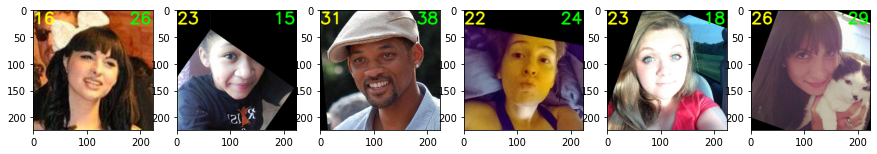

In [15]:
w, b = gradient_descent(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate score is:", round(loss, 3))

#  Test and Generate results file

In [16]:
prediction = test(w, b, features_test, 'gd.txt')
print("Test results has saved to gd.txt")
print(prediction[:10])

Test results has saved to gd.txt
[[25.15306823]
 [71.33868548]
 [47.02168654]
 [21.43172861]
 [35.50320408]
 [34.11889117]
 [35.0120007 ]
 [42.26724541]
 [22.96934881]
 [56.92772398]]


# Implement Stochastic Gradient descent
Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.
```
Arguments:
    age          -- numpy array, label, (n, )
    feature      -- numpy array, features, (n, 2048)
Return:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [ ]:
def stochastic_gradient_descent(age, feature):
    # check the inputs
    assert len(age) == len(feature)
    
    # Set the random seed
    np.random.seed(0)

    # Init weights and bias
    weights = np.random.rand(2048, 1)
    bias = np.random.rand(1, 1)

    # Learning rate
    lr = 10e-5

    # Batch size
    batch_size = 16
 
    # Number of mini-batches
    t = len(age) // batch_size

    for e in range(epoch_sgd):
        # Shuffle training data
        n = np.random.permutation(len(feature))  
        
        for m in range(t):
            # Providing mini batch with fixed batch size of 16
            batch_feature = feature[n[m * batch_size : (m+1) * batch_size]]
            batch_age = age[n[m * batch_size : (m+1) * batch_size]]
            
            ##########################################################################
            # TODO: YOUR CODE HERE
            ########################################################################## 
            weights = np.reshape(weights, (2048, ))
            bias = np.reshape(bias, (1, ))
            X = batch_feature
            y = batch_age
            N = len(y)

            # forward pass
            yhat = np.dot(X, weights) + bias

            # calculate loss
            err = y - yhat
            loss = (1 / N) * np.dot(err.T, err)

            # calculate gradient 
            w_grad = - (2 / N) * np.dot(X.T, err)
            b_grad = - (2 / N) * np.sum(err)

            # update weights
            # for Project 7, momentum = False
            # for Project 8, momentum = True
            momentum = True
            if (not momentum):
              weights -= lr * w_grad
              bias    -= lr * b_grad
                
            if momentum:
                # You can also consider the stochastic gradient descent with momentum
                alpha = 0.9
                if e == 0:
                  w_v = 0
                  b_v = 0
                w_v = alpha * w_v - lr * w_grad
                b_v = alpha * b_v - lr * b_grad
                weights += w_v
                bias    += b_v
        
        print('=> epoch:', e + 1, '  Loss:', round(loss,4))
    return weights, bias

# Train and validate

=> epoch: 1   Loss: 251.6087
=> epoch: 2   Loss: 48.7245
=> epoch: 3   Loss: 16.919
=> epoch: 4   Loss: 25.7455
=> epoch: 5   Loss: 22.9698
=> epoch: 6   Loss: 30.4447
=> epoch: 7   Loss: 22.1357
=> epoch: 8   Loss: 29.161
=> epoch: 9   Loss: 47.9214
=> epoch: 10   Loss: 22.0436
=> epoch: 11   Loss: 26.486
=> epoch: 12   Loss: 38.4786
=> epoch: 13   Loss: 25.5618
=> epoch: 14   Loss: 17.2884
=> epoch: 15   Loss: 11.3813
=> epoch: 16   Loss: 44.6642
=> epoch: 17   Loss: 25.0459
=> epoch: 18   Loss: 15.4374
=> epoch: 19   Loss: 21.6067
=> epoch: 20   Loss: 27.516
=> epoch: 21   Loss: 18.8556
=> epoch: 22   Loss: 17.348
=> epoch: 23   Loss: 57.4436
=> epoch: 24   Loss: 25.5176
=> epoch: 25   Loss: 16.81
=> epoch: 26   Loss: 8.4737
=> epoch: 27   Loss: 27.057
=> epoch: 28   Loss: 22.3161
=> epoch: 29   Loss: 27.1141
=> epoch: 30   Loss: 12.5039
=> epoch: 31   Loss: 45.9629
=> epoch: 32   Loss: 17.6181
=> epoch: 33   Loss: 9.3914
=> epoch: 34   Loss: 65.0165
=> epoch: 35   Loss: 14.6362
=> 

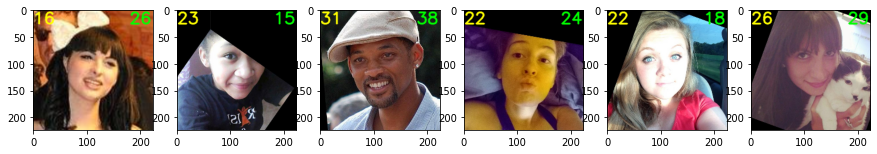

In [18]:
w, b = stochastic_gradient_descent(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate score is:", round(loss, 3))

# Test and Generate results file

In [19]:
prediction = test(w, b, features_test, 'sgd.txt')
print("Test results has saved to sgd.txt")
print(prediction[:10])

Test results has saved to sgd.txt
[[25.70526669]
 [69.02817737]
 [47.71143016]
 [20.85597627]
 [34.85225924]
 [34.13029414]
 [34.0993722 ]
 [41.80837507]
 [23.92749073]
 [57.35965914]]
